In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

['Eco-Driving_only_demand10_CAV10_5684.csv', 'No_control_demand10_CAV10_5465.csv', 'Proposed_control_demand10_CAV0_5396.csv', 'Proposed_control_demand10_CAV10_5688.csv', 'Signal_optimization_only_demand10_CAV0_5431.csv', 'Signal_optimization_only_demand10_CAV10_5692.csv']
4
6
4
4


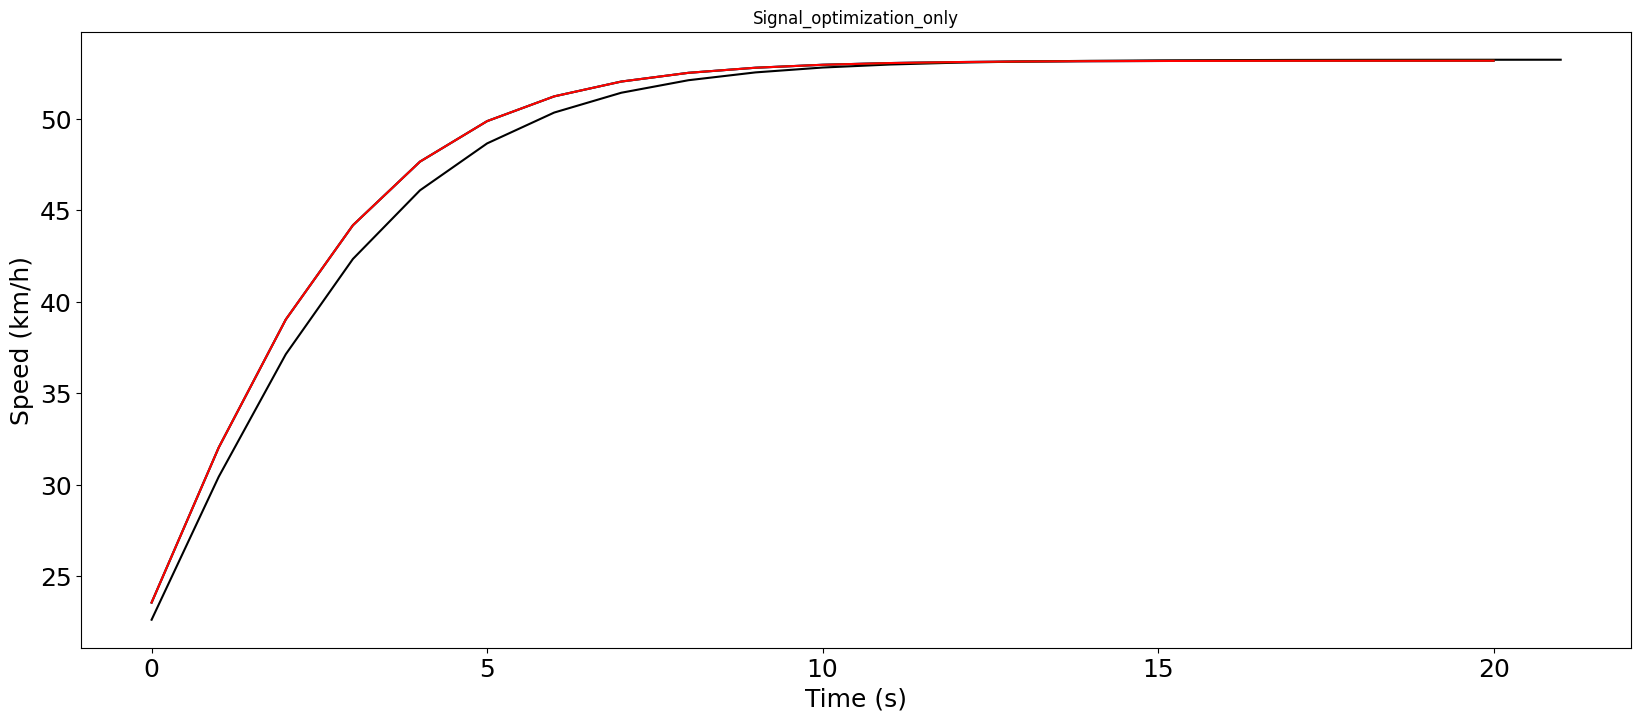

In [38]:
control_method = ["No_control", "Signal_optimization_only", "Eco-Driving_only", "Proposed_control"]
demand_perct = ["10"]
cav_percentage = ["10"]
repli_id = []
file_path = 'results/'
file_list = os.listdir(file_path)
print(file_list)
## vehicle type ID
# ICEV_CAV = 5380,
# ICEV_NON_CAV = 154,
# BEV_CAV = 5591,
# BEV_NON_CAV = 5590,
# HEV_CAV = 5596,
# HEV_NON_CAV = 5597,
# PHEV_CAV = 5592,
# PHEV_NON_CAV = 5593,
# HFCV_CAV = 5594,
# HFCV_NON_CAV = 5595
control_vehicle_id = 5380
non_control_vehicle_id = 154
# section id for the control node
section_dict = {'1249': [1252, 5325], '1272': [1270, 1784]}
plot_speed_time_veh_idx = 0

plt.figure(figsize=(20,8))
for item in file_list:
    control_idx = item[0:item.find("_demand")]
    subname_1 = item[item.find('demand')+6:]
    demand_percent = int(subname_1[0:subname_1.find("_C")])
    subname_2 = item[item.find("CAV")+3:]
    cav_percent = int(subname_2[0:subname_2.find("_")])
    repli_id = subname_2[subname_2.find("_")+1:subname_2.find(".")] # last four digits are replication id

    # plot trajectory results only for one replication, CAV 10% and demand 10% under each control strategy
    if demand_percent == 10 and cav_percent == 10:
        datafile = file_path + control_idx + "_demand" + str(demand_percent) + "_CAV" + str(cav_percent) + "_" + repli_id + ".csv"
        trajectory = pd.read_csv(datafile, delimiter='\t')

        # plot speed versus time
        cav_trajectory = trajectory[trajectory['veh_type_id'] == control_vehicle_id]
        cav_ids = cav_trajectory['vehicle_id'].unique()
        print(cav_ids[plot_speed_time_veh_idx])
        target_vehicle_trajctory = cav_trajectory[cav_trajectory['vehicle_id'] == cav_ids[plot_speed_time_veh_idx]]
    
        if control_idx == control_method[0]:
            color = 'k'
        elif control_idx == control_method[1]:
            color = 'r'
        elif control_idx == control_method[2]:
            color = 'b'
        else:
            color = 'g'

        time = range(len(target_vehicle_trajctory['CurrentSpeed']))
        plt.plot(time, target_vehicle_trajctory['CurrentSpeed'], color)
        plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
        plt.ylabel('Speed (km/h)', fontdict={'size': 18})
        plt.title(str(control_idx))
        plt.xticks(fontsize = 18)
        plt.yticks(fontsize = 18)

        # # plot distance versus time
        # filter_trajctory_by_time = trajectory[trajectory['simulation_time'].between(4000, 4500)]
        # vehicle_id = filter_trajctory_by_time.vehicle_id.unique()

        # for col_section, downstream_section in section_dict.items():
        #     col_section = int(col_section)
        #     # all distance2End on control sections should be multiplied by -1 to ensure vehicles trajectories go upward in the figure
        #     filter_trajctory_by_time.loc[filter_trajctory_by_time['section_id']==col_section, 'distance2End'] *= -1
        
        # plot_sec_id = [1249, 1252]
        # numlane = [1, 2, 3]
        # reduced_trajectory = filter_trajctory_by_time[filter_trajctory_by_time.section_id.isin(plot_sec_id)]

        # plt.figure(figsize=(20,8))

        # for veh_id in vehicle_id:
        #     veh_id_df = reduced_trajectory[reduced_trajectory.vehicle_id == veh_id].sort_values('simulation_time')

        #     if veh_id_df['section_id'] not in np.array(plot_sec_id[0]): # do not plot trajectories for those which do not travel from the control section
        #         continue
            
        #     if control_vehicle_id in veh_id_df['veh_type_id'].unique():
        #         color = 'g'
        #     else:
        #         color = 'k--'
            
        #     veh_id_df = veh_id_df[veh_id_df['numberLane'].isin(numlane)]
        #     error_check = error_check.append(veh_id_df)
        #     time = veh_id_df['simulation_time']
        #     plt.plot(time, veh_id_df['distance2End'], color)
        #     plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
        #     plt.ylabel('Distance to the stop line (m)', fontdict={'size': 18})
        #     plt.title(str(control_idx))
        #     plt.xticks(fontsize = 18)
        #     plt.yticks(fontsize = 18)

